# MIE304 Course Project: Quality Control of Peanut Sorting Process

April 14th, 2022

Sydney Perrin

(Omitted Bayesian)

# Background

The process being monitored is the process of sorting in-shell peanuts in a peanut processing plant to be sold in commercial stores as a snack food.  The variable data of length in millimeters (mm) was measured using calipers. The attribute data for the number of defectives/nonconformities was measured visually. For the purpose of this report, a peanut was considered defective if it has any of the following nonconformities: a crack (C), hole (H), missing nut (M), discolouration (D) or combination of these. In order to generate appropriate control charts, the sampling method was varied as described for each chart.

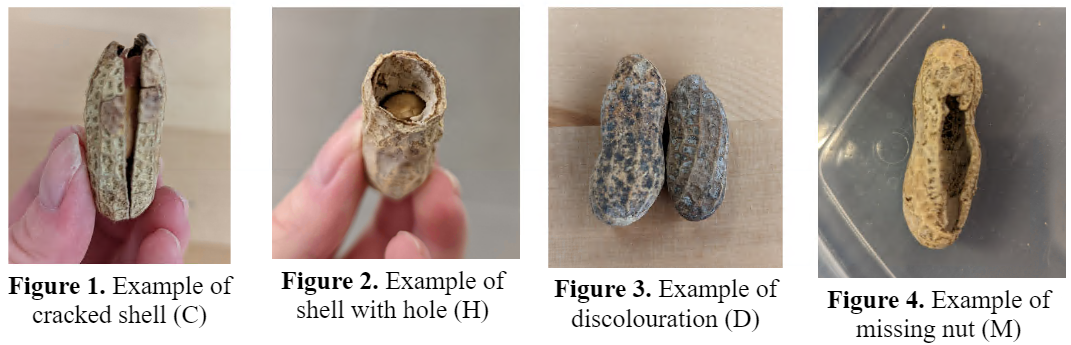

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import math as math

# Control Charts for Attributes I

The p chart (Figure 5) shows the proportion of defective units (peanuts) in a sample. A peanut was either considered defective or not defective (binary 1 or 0) if there was any nonconfirmity. The data was processed by collecting m=20 samples of a constant sample size n=10 peanuts. Half of the collected data was used to calculate the control limits (m=10 samples of sample size n=10 peanuts). For the p chart, the control limits were UCL=1.003, CL=0.53 and LCL=0.057. For the np chart, the control limits (Figure 6) were UCL=10.03 , CL=5.3 and LCL=0.57. The entire data set was plotted to monitor the process. There were no points out of control. 

## p Chart: Fraction of Defectives

In [2]:
df=pd.read_csv('Attribute Data (m=20, n=10).csv')
df2=df[0:10]
#df.head(100)

### Calculations

In [3]:
m=20 # Number of samples
n=10 # Sample size

# Calculate control limits based on half of the collected data
pvalues = df2.num_defectives/n
df['pvalues']=pvalues
pbar = df.pvalues.mean()
CL_p = pbar
UCL_p = pbar + 3*np.sqrt((pbar*(1-pbar))/10)
LCL_p = pbar - 3*np.sqrt((pbar*(1-pbar))/10)

print('UCL_p=', UCL_p)
print('CL_p=', CL_p)
print('LCL_p=', LCL_p)

UCL_p= 1.0034870642372398
CL_p= 0.53
LCL_p= 0.056512935762760286


### Plot

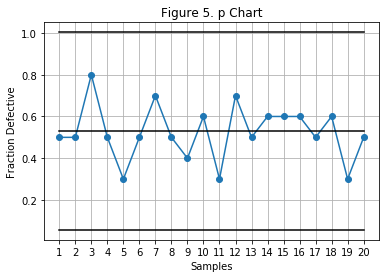

In [4]:
pvalues_plot = df.num_defectives/n # Monitor all of the data points in the control chart

ucl_line = np.full(m,UCL_p) 
lcl_line = np.full(m,LCL_p)
cl_line = np.full(m,CL_p) 
plt.plot(pvalues_plot,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('Figure 5. p Chart')
plt.ylabel('Fraction Defective')
plt.xlabel('Samples')
plt.show()

# There are no points out of bounds.

# Control Charts for Attributes II

## np Chart: Number of Defectives

### Calculations

In [5]:
n=10
npbar = n*pbar
CL_np = npbar
UCL_np = npbar + 3*np.sqrt(npbar*(1-pbar))
LCL_np = npbar - 3*np.sqrt(npbar*(1-pbar))

print('UCL_np=', UCL_np)
print('CL_np=', CL_np)
print('LCL_np=', LCL_np)

UCL_np= 10.034870642372399
CL_np= 5.300000000000001
LCL_np= 0.5651293576276029


### Plot

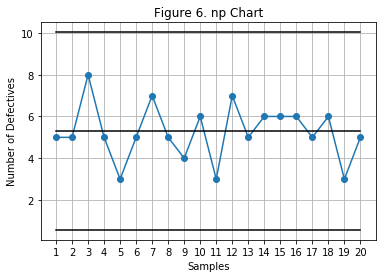

In [6]:
pvalues_plot = df.num_defectives/n # monitor all of the data points in the control chart

ucl_line = np.full(m,UCL_np) 
lcl_line = np.full(m,LCL_np)
cl_line = np.full(m,CL_np) 
plt.plot(n*pvalues_plot,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('Figure 6. np Chart')
plt.ylabel('Number of Defectives')
plt.xlabel('Samples')
plt.show()

# There are no points out of bounds.

## c Chart: Number of Nonconformities

The c chart (Figure 7) monitors the total number of nonconformities in a sample. For this chart, a peanut can have more than one type of nonconformity counted. The types of nonconformities are defined in Figures 1-4. The data was processed by collecting m=200 samples of sample size n=1 peanuts. Half of the collected data (m=100 samples of sample size n=1 peanuts) was used to calculate the control chart limits. The control limits were UCL=3.011, CL=0.630 and LCL=-1.751. The entire data set was plotted to monitor the process. There were no points out of control. 

In [7]:
df = pd.read_csv('Raw Data.csv')
df2 = df[0:100]

### Calculations

In [8]:
m=200 # Number of samples
n=1 # Sample size

# Calculate control limits based on half of the collected data
cbar = df2.num_nonconformities.mean()
CL_c=cbar
UCL_c = cbar+3*np.sqrt(cbar)
LCL_c = cbar-3*np.sqrt(cbar)

print('UCL_c=',UCL_c)
print('CL_c=',CL_c)
print('LCL_c=',LCL_c)

UCL_c= 3.0111761799581314
CL_c= 0.63
LCL_c= -1.7511761799581316


### Plot

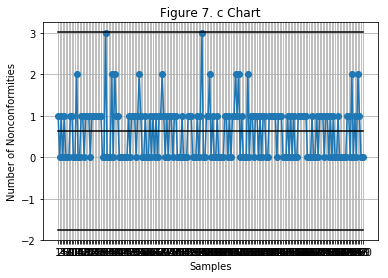

In [9]:
c = df.num_nonconformities # Monitor all of the data points in the control chart

ucl_line = np.full(m,UCL_c) 
lcl_line = np.full(m,LCL_c)
cl_line = np.full(m,CL_c) 
plt.plot(c,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('Figure 7. c Chart')
plt.ylabel('Number of Nonconformities')
plt.xlabel('Samples')
plt.show()

# There are no points out of bounds.

### Beta example: If the expected number of nonconformities changes to 1.5, what is the probability of detecting this shift on the first sample after the shift?

The c chart (Figure 7) follows a poisson distribution. Using this, the probability of detecting this shift on the first sample after the shift is (1-beta)=0.06564 or 6.56%.

In [10]:
# Poisson distribution
# Use the shifted mu=1.5
# Use integer values for defects
beta = stat.poisson.cdf(math.floor(UCL_c), 1.5)-stat.poisson.cdf(math.floor(LCL_c), 1.5)
print('beta=',beta)
print('probability=',1-beta)

beta= 0.9343575456215499
probability= 0.06564245437845007


## u Chart: Average Number of Nonconformities per Sample

The u chart (Figure 8) monitors the average number of total nonconformities per sample. The data was processed by collecting m=20 samples of sample size n=10 peanuts. Half of the collected data (n=10 samples of sample size n=10 peanuts) was used to calculate the control chart limits. The control chart limits were UCL=1.383, CL=0.630 and LCL=-0.123. The entire data set was plotted to monitor the process. There were no points out of control. 

In [11]:
df=pd.read_csv('Attribute Data (m=20, n=10).csv')
df2=df[0:10]

### Calculate

In [12]:
m=20 # Number of samples
n=10 # Sample size

num_units_sum=100 #100 instead of 200 because half of the data is used to calculate control limits
ubar = df2.num_nonconformities.sum()/num_units_sum
CL_u=ubar
UCL_u = ubar + 3*np.sqrt(ubar/n)
LCL_u = ubar - 3*np.sqrt(ubar/n)

print('UCL=', UCL_u)
print('CL=', CL_u)
print('LCL=', LCL_u)

UCL= 1.382994023880668
CL= 0.63
LCL= -0.12299402388066794


### Plot

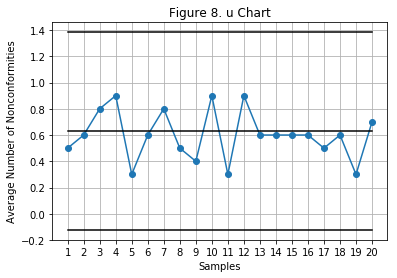

In [13]:
u = df.num_nonconformities # Monitor all of the data points in the control chart

ucl_line = np.full(m,UCL_u) 
lcl_line = np.full(m,LCL_u)
cl_line = np.full(m,CL_u) 
plt.plot(u/n,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('Figure 8. u Chart')
plt.ylabel('Average Number of Nonconformities')
plt.xlabel('Samples')
plt.show()

# There are no points out of bounds.

### Beta example: If the expected fraction of nonconformities changes to 0.7, what is the probability of not detecting this shift on the first sample after the shift?

The u-chart (Figure 8) follows a poisson distribution. Using this, the probability of not detecting this shift on the first sample after the shift is beta=0.8442 or 84.42%. 

In [14]:
# Poisson distribution
# Use the shifted mu=0.7 
beta = stat.poisson.cdf(math.floor(UCL_u), 0.7)-stat.poisson.cdf(math.floor(LCL_u), 0.7)
print('beta=',beta)

beta= 0.8441950164453962


## Demerit Chart

The types of nonconformities outlined in Figures 1-4 have varying importance. The types of nonconformities are classified as either a crack (C), hole (H), missing nut (M), or discolouration (D). The weights of each class are 100 for M, 50 for H, 10 for C and 1 for D. To explain, a missing nut (M) is the most heavily weighted because the product is useless if there is no peanut to eat. A crack (C) or hole (H) are less serious but increase the likelihood of losing a nut. Discolouration is not aesthetically pleasing but is a minor thus it is weighted the lowest. A sample of size 200 was taken. The number of nonconformities per class were counted from the raw data and summarized in the table below.

The total number of demerit points in the sample is 3317. The average number of each class of nonconformity per peanut is 0.03 for M, 0.205 for H, 0.33 for C and 0.035 for D. It’s an interesting observation that on average approximately a fifth of peanut shells have a hole and approximately a third are pre-cracked. The control limits used to construct a demerit control chart are UCL=22.753, CL=16.585 and LCL=10.417 where sigma_u=2.056.

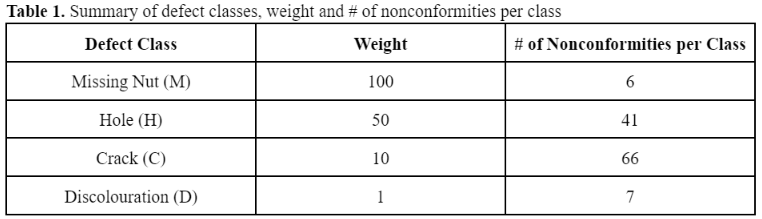

### Total Number of Demerit Points in Sample

In [15]:
# Number of nonconformities per class:
numM = 6
numH = 41
numC = 66
numD = 7

# Weights for each class
wtM = 100
wtH = 50
wtC = 10
wtD = 1

tot_num = wtM*numM + wtH*numH + wtC*numC + wtD*numD
print('tot_num=',tot_num)

tot_num= 3317


### Average Number of Each Class per Peanut

In [16]:
n=200
ubarM = numM/n # 6/200
ubarH = numH/n # 41/200
ubarC = numC/n # 66/200
ubarD = numD/n # 7/200

print('ubarM=', ubarM)
print('ubarH=', ubarH)
print('ubarC=', ubarC)
print('ubarD=', ubarD)

ubarM= 0.03
ubarH= 0.205
ubarC= 0.33
ubarD= 0.035


### Demerit Control Chart Limits

In [17]:
n=200

ubar = wtM*ubarM + wtH*ubarH + wtC*ubarC + wtD*ubarD
sigma_u = np.sqrt((100*100*ubarM + 50*50*ubarH + 10*10*ubarC + ubarD)/n)
print('sigma_u=', sigma_u)

CL = ubar
UCL = ubar + 3*sigma_u
LCL = ubar - 3*sigma_u

print('UCL', UCL)
print('CL=', CL)
print('LCL', LCL)

sigma_u= 2.056131075588324
UCL 22.753393226764974
CL= 16.585
LCL 10.416606773235028


# Process Capability Study

The data was processed by collecting m=20 samples of sample size n=10 peanuts. The X-bar (Figure 10) and R charts (Figure 9) were constructed to approximate the process mean of mu=37.485 mm and process standard deviation of sigma=6.517 mm. Half of the collected data (n=10 samples of sample size n=10 peanuts) was used to calculate the control chart limits. For the R chart, the control chart limits were UCL=35.647 mm, CL=20.060 mm and LCL=4.473 mm. For the X-bar chart, the control limits were UCL=43.663 mm, CL=37.485 mm and LCL=31.307 mm. The entire data set was plotted to monitor the process. There were no points out of control. Note that the assumption is made that the data is normally distributed.

The natural tolerance limits of this process were calculated. The upper natural tolerance limit was calculated to be UNTL=57.037 mm and the lower natural tolerance limit was calculated to be LNTL=17.933 mm. For the purpose of this report, assume the specification limits for peanut length are specified as USL=60 mm and LSL=15 mm from the client. 

The value of Cp is calculated to be Cp=1.151. The basic capability requirement is met. To explain, the process is capable because the value of Cp is greater than 1. This means that peanut units will be falling within the upper and lower specification limits. 86.9% (1/Cp) of the available capability is being used. 

Other ratio values were calculated to be Cpu=1.1516, Cpl=1.500 and Cpk=1.500. The process is centered because Cpu is approximately equal to Cpl. The difference between them is negligible. The value of Cpm is 1.1508. 

The process fallout is calculated to be approximately 556 ppm. This means that of a million peanuts sorted, approximately 556 of them will be defective.


In [18]:
df=pd.read_csv('Raw Data.csv')
df2=df[0:100] # Use half of the data to calculate the control limits.

## X-bar and R Charts
Used to get estimates of mu and sigma

### Calculate

In [19]:
m=20 # number of samples
n=10 # sample size

# 'Sample2' represents the sample numbers of sample size n=10.
Rvalues = df2.groupby(['Sample2']).Length.max()-df2.groupby(['Sample2']).Length.min() # For half data set
Rbar = np.mean(Rvalues)
CL_R = Rbar

# Control chart constants for n=10
D4 = 1.777
D3 = 0.223
A2 = 0.308
d2= 3.078

UCL_R = D4*Rbar
LCL_R = D3*Rbar

print('UCL_R=', UCL_R)
print('CL_R=', CL_R)
print('LCL_R=', LCL_R)

UCL_R= 35.64662
CL_R= 20.06
LCL_R= 4.47338


### Plot

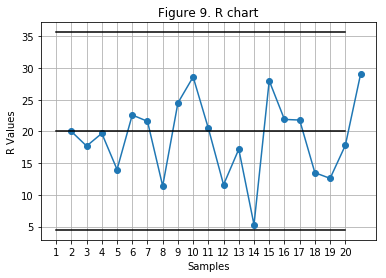

In [20]:
Rvalues = df.groupby(['Sample2']).Length.max()-df.groupby(['Sample2']).Length.min() # Plot for full data set

ucl_line = np.full(m,UCL_R) 
lcl_line = np.full(m,LCL_R)
cl_line = np.full(m,CL_R)
plt.plot(Rvalues,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('Figure 9. R chart')
plt.ylabel('R Values')
plt.xlabel('Samples')
plt.show()

# There are no points out of control.

### Calculate

In [21]:
# Calculate control limits using half of the data set
xbarvalues = df2.groupby(['Sample2']).Length.mean() # For half of the data set
xbarbar = np.mean(xbarvalues)
CL_X = xbarbar
UCL_X = xbarbar + A2*Rbar
LCL_X = xbarbar - A2*Rbar

print('UCL_X=', UCL_X)
print('CL_X=', CL_X)
print('LCL_X=', LCL_X)

UCL_X= 43.66348
CL_X= 37.485
LCL_X= 31.30652


### Plot

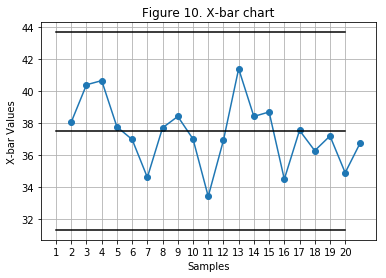

In [22]:
xbarvalues = df.groupby(['Sample2']).Length.mean() # Plot for entire data set

ucl_line = np.full(m,UCL_X) 
lcl_line = np.full(m,LCL_X) 
cl_line = np.full(m,CL_X) 
plt.plot(xbarvalues,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('Figure 10. X-bar chart')
plt.ylabel('X-bar Values')
plt.xlabel('Samples')
plt.show()

# There are no points out of control.

### Estimate of mu and sigma

In [23]:
# Estimate of process mean and sigma
print('mean=', xbarbar)

sigma_X = Rbar/d2
print('sigma_X=', sigma_X)

mean= 37.485
sigma_X= 6.517218973359324


### Natural Tolerance Limits and Specification Limits

In [24]:
UNTL = xbarbar + 3*sigma_X # Upper natural tolerance limit
LNTL = xbarbar - 3*sigma_X # Lower natural tolerance limit

print('UNTL=', UNTL)
print('LNTL=', LNTL)

USL=60 # Upper specification limit
LSL=15 # Lower specification limit

print('USL=', USL)
print('LSL=', LSL)

UNTL= 57.036656920077974
LNTL= 17.933343079922025
USL= 60
LSL= 15


### Capability Requirements - Cp and P

In [25]:
Cp = (USL-LSL)/(6*sigma_X)
print ('Cp=', Cp)

P=1/Cp
print('P=', P)
print(P*100,'% of the available capability is being used. The lower this is the more flexibility there is in the system')

Cp= 1.1507976071784645
P= 0.8689625297812433
86.89625297812434 % of the available capability is being used. The lower this is the more flexibility there is in the system


### Other Ratios

In [26]:
mu= 37.485
sigma = 6.517218973359324

Cpu = (USL-mu)/(3*sigma)
print('Cpu=',Cpu)

Cpl = (mu - LSL)/(3*sigma)
print('Cpl=',Cpl)

Cpk = min(Cpu,Cpl) # Minimum of Cpu and Cpl
print('Cpk=',Cpk)

T = 0.5*(USL+LSL)
V = (mu - T)/sigma
Cpm = Cp/np.sqrt(1+V*V)
print('Cpm=', Cpm)

Cpu= 1.1515648055832501
Cpl= 1.1500304087736788
Cpk= 1.1500304087736788
Cpm= 1.1507945591071709


### Process Fallout

In [27]:
mu = xbarbar
sigma = sigma_X

pf = 1-(stat.norm.cdf(USL, mu, sigma)-stat.norm.cdf(LSL, mu, sigma))
pf = 1000000*pf # convert to ppm
print('pf=', pf, 'ppm')

pf= 555.6570003383276 ppm


# CUSUM Charts (n=1)

The data was processed by collecting m=200 samples of sample size n=1 peanuts. The data failed the normality tests. Visually, the data is not normally distributed from the probability plot (Figures 11,12). From the Shapiro test, the p-value is 2.89x10^-5 and from the normal test the p-value is 0.04. However, the p-values became even smaller when taking the log of the data. Note that the assumption was made that the original data is normally distributed because the p-value from the Shapiro test of 0.04 is close to the threshold value of 0.05. 

Half of the collected data was used to calculate the control chart limits. For the MR chart (Figure 13), the initial control limits were UCL=23.09 mm, CL=7.07 mm and LCL=0 mm. There was a point out of bounds that was removed and the control limits recalculated. The revised MR chart (Figure 14) control limits were UCL=22.73 mm, CL=6.96 mm and LCL=0 mm. The individuals chart (Figure 15) control limits were UCL=55.99 mm, CL=37.48 mm and LCL=18.98 mm. The entire data set was plotted to monitor the process. From the MR and I charts, the estimate of the process mean is mu=37.48 mm and the estimate of the process standard deviation is sigma=6.17 mm (calculated using revised MRbar). For the CUSUM charts (Figures 16-18), the assumption was made that h=4.77 and k=0.5 as in Assignment 11. There are points out of bounds in the CUSUM charts.

In [28]:
df=pd.read_csv('Raw Data.csv')

## MR and I Charts
Used to estimate mu and sigma

### Check for Normality

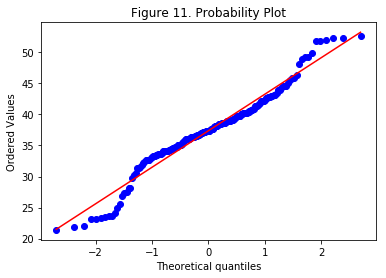

Shapiro: (0.9615074992179871, 2.8894794013467617e-05)
Normal Test: NormaltestResult(statistic=6.2937854750845785, pvalue=0.04298548675687671)


In [29]:
x=df['Length']

# Check for normality

# Graphic Test
stat.probplot(x, plot=plt)
plt.title('Figure 11. Probability Plot')
plt.show()

# Stats Test
t1=stat.shapiro(x)
t2=stat.normaltest(x)
print('Shapiro:', t1)
print('Normal Test:', t2)

# Data is not normally distributed. Take log.

### Take log(x) and Re-Check for Normality

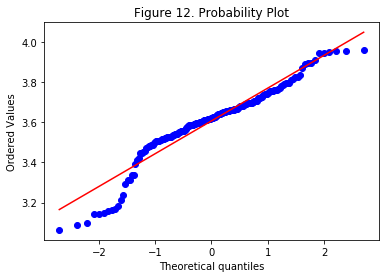

Shapiro: (0.9265380501747131, 1.8073651020245052e-08)
Normal Test: NormaltestResult(statistic=32.36383997936697, pvalue=9.3816978515755e-08)


In [30]:
y=np.log(x)

# Re-check for normality

# Graphic Test
stat.probplot(y, plot=plt)
plt.title('Figure 12. Probability Plot')
plt.show()

# Stats Test
t1=stat.shapiro(y)
t2=stat.normaltest(y)
print('Shapiro:', t1)
print('Normal Test:', t2)

# This made the data less normal. Assume proceed with x.
x=df['Length']

### MR Calculations

In [31]:
# Moving range (MR) values
MR = 199*[None]
for i in range(199):
    MR[i]=np.abs(x[i+1]-x[i])

# MR control chart constants for n=2
A2 =1.880
d2=1.128
D4=3.267
D3=0

MR_half=MR[0:100] # Calculate control limits with half the data.
MRbar=np.mean(MR_half)
CL_MR = MRbar
UCL_MR = D4*MRbar
LCL_MR = D3*MRbar #0

print('UCL_MR=', UCL_MR)
print('CL_MR=', CL_MR)
print('LCL_MR=', LCL_MR)

# Check if out of bounds beore x (I) calculations

UCL_MR= 23.091155999999998
CL_MR= 7.068
LCL_MR= 0.0


### Plot

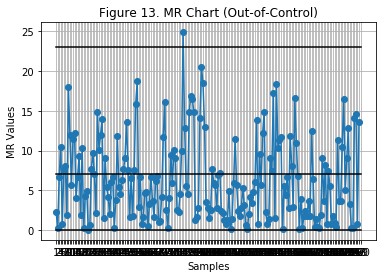

In [32]:
m=200
ucl_line = np.full(m,UCL_MR) 
lcl_line = np.full(m,LCL_MR) 
cl_line = np.full(m,CL_MR) 
plt.plot(MR,marker="o") # Monitor the entire data set.
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('Figure 13. MR Chart (Out-of-Control)')
plt.ylabel('MR Values')
plt.xlabel('Samples')
plt.show()

# There is a point out of bounds. Revise MR chart.

### Iterate

In [33]:
# Remove out of bounds points from half data to recalculate control limits.
MR_half2_df = pd.DataFrame(MR_half) # Needed to put array into df for below line to work.
MR_half2 = MR_half2_df[(MR_half2_df>LCL_MR)&(MR_half2_df<UCL_MR)]
MRbar2=np.mean(MR_half2)
CL_MR2 = MRbar2
UCL_MR2 = D4*MRbar2
LCL_MR2 = D3*MRbar2 #0

# Remove out of bounds points from entire data set to plot.
MR2df = pd.DataFrame(MR)
MR2 = MR2df[(MR2df>LCL_MR)&(MR2df<UCL_MR)]

print('UCL_MR2=', UCL_MR2)
print('CL_MR2=',CL_MR2)
print('LCL_MR2=',LCL_MR2)

UCL_MR2= 0    22.732319
dtype: float64
CL_MR2= 0    6.958163
dtype: float64
LCL_MR2= 0    0.0
dtype: float64


### Plot to check no remaining points are out of bounds

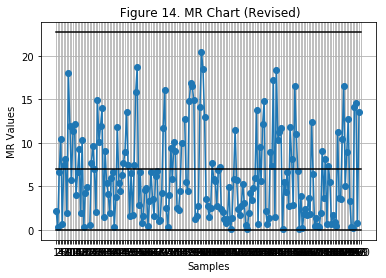

In [34]:
m=200
ucl_line = np.full(m,UCL_MR2) 
lcl_line = np.full(m,LCL_MR2) 
cl_line = np.full(m,CL_MR2) 
plt.plot(MR2,marker="o") # Monitor the entire data set.
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title(' Figure 14. MR Chart (Revised)')
plt.ylabel('MR Values')
plt.xlabel('Samples')
plt.show()

# There are no points out of bounds.

### Individuals Calculations

In [35]:
# Individuals control chart constants for n=2
E2=2.660

x=df['Length']
x_half=x[0:100] # Calculate control limits with half the data.
xbar=np.mean(x_half)
CL_x=xbar
UCL_x=xbar + E2*MRbar2
LCL_x=xbar - E2*MRbar2

print('UCL_x=',UCL_x)
print('CL_x=',CL_x)
print('LCL_x=',LCL_x)

UCL_x= 0    55.993714
dtype: float64
CL_x= 37.484999999999985
LCL_x= 0    18.976286
dtype: float64


### Plot

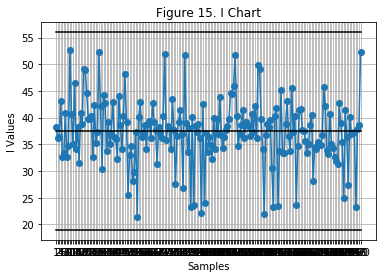

In [36]:
ucl_line = np.full(m,UCL_x) 
lcl_line = np.full(m,LCL_x) 
cl_line = np.full(m,CL_x) 
plt.plot(x,marker="o") # Monitor the entire data set.
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('Figure 15. I Chart')
plt.ylabel('I Values')
plt.xlabel('Samples')
plt.show()

# There are no points out of bounds.

### Estimate of mu and sigma

In [37]:
# Estimate of process mean
mu_0 = xbar
print('mean=', mu_0)

mean= 37.484999999999985


In [38]:
sigma_0 = MRbar2/d2
print('sigma=', sigma_0)

sigma= 0    6.168584
dtype: float64


## Tabular Two-Sided CUSUM Chart

### Calculations

In [39]:
h=4.77
k=0.5

mu_0=37.484999999999985 # from MR & I chart
sigma_0=6.168584 # from MR & I chart

cplus = 200*[None] #initialize an array
cminus = 200*[None] # initialize an array

cplus[0]=0 #starting value
cminus[0]=0 #starting value

K = k*sigma_0
H = h*sigma_0

x=df['Length']
for i in range(199):
    cplus[i+1]=max(0, x[i+1]-(mu_0+K)+cplus[i])
    cminus[i+1]=max(0, (mu_0-K)-x[i+1]+cminus[i])

### Plot

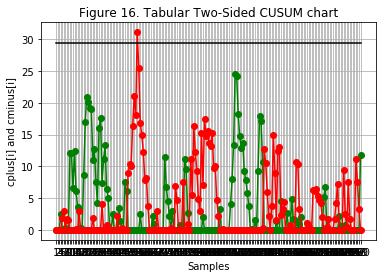

In [40]:
ucl_line = np.full(m,H) 
plt.plot(cplus, marker="o", color='g')
plt.plot(cminus, marker="o", color='r')
plt.plot(ucl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('Figure 16. Tabular Two-Sided CUSUM chart')
plt.ylabel('cplus[i] and cminus[i]')
plt.xlabel('Samples')
plt.show()

# There is a point out of bounds.

## CUSUM Chart for Mean

### Calculations

In [41]:
x=df['Length']

# Assume using same h and k from previous.
h=4.77
k=0.5

cplus = 200*[None] #initialize an array
cminus = 200*[None] # initialize an array
cplus[0]=0 #starting value
cminus[0]=0 #starting value

# Standardize
z_vals = []
for i in range(200):
    zi=(x[i]-mu_0)/sigma_0
    z_vals.append(zi)
df['z_vals']=z_vals
zi=z_vals

# Mean of standardized x values to get standardized mean
mu_0 = np.mean(zi)

H = h*sigma_0
K= k*sigma_0

for i in range(199):
    cplus[i+1] = max(0, zi[i+1]-k+cplus[i])
    cminus[i+1]=max(0, -zi[i+1]-k+cminus[i])  

### Plot

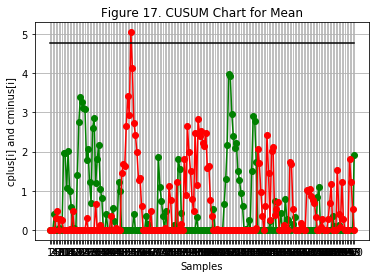

In [42]:
ucl_line = np.full(m,h) 
plt.plot(cplus, marker="o", color='g')
plt.plot(cminus, marker="o", color='r')
plt.plot(ucl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('Figure 17. CUSUM Chart for Mean')
plt.ylabel('cplus[i] and cminus[i]')
plt.xlabel('Samples')
plt.show()

# There is a point out of bounds.

## CUSUM Chart for Variance

### Calculations

In [43]:
cplus2 = 200*[None] #initialize an array
cminus2 = 200*[None] # initialize an array
cplus2[0]=0 #starting value
cminus2[0]=0 #starting value

v_vals=[]
for i in range(200):
    y=abs(zi[i])
    v=(np.sqrt(y)-0.822)/0.349
    v_vals.append(v)
df['v_vals']=v_vals
vi=v_vals
#print(vi)

for i in range(199):
    cplus2[i+1] = max(0, vi[i+1]-k+cplus2[i])
    cminus2[i+1]=max(0, -vi[i+1]-k+cminus2[i]) 

### Plot

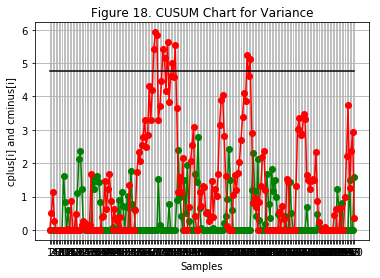

In [44]:
ucl_line = np.full(m,h) 
plt.plot(cplus2, marker="o", color='g')
plt.plot(cminus2, marker="o", color='r')
plt.plot(ucl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('Figure 18. CUSUM Chart for Variance')
plt.ylabel('cplus[i] and cminus[i]')
plt.xlabel('Samples')
plt.show()

# EWMA Chart

The values of mu=37.48 mm and sigma=6.17 mm from the previous MR and I charts are used in building the EWMA chart (Figure 19). For the purpose of this report, we wish to detect all the shifts of 1.0sigma that may happen in this process with a EWMA control chart. From Table 9.2, the values of L=2.814 and lamda=0.10 will result in the lowest ARL=10.3. These values of L and lamda were used in calculating the control limits. There are no points out of bounds.

### Calculate

In [45]:
x=df['Length']
mu=37.484999999999985 # from MR & I chart
sigma=6.168584 # from MR & I chart

lam = 0.1
L = 2.814

z = 200*[None] # Initialize an array
z[0] = mu # Initialize first value

UCL=200*[None] # Initialize an array
LCL=200*[None] # Initialize an array

for i in range(1,199):
    z[i]=lam*x[i-1]+(1-lam)*z[i-1]
    term1=(lam/(2-lam))*(1-(1-lam)**(2*(i)))
    term2=L*sigma*np.sqrt(term1)
    UCL[i]=mu+term2
    LCL[i]=mu-term2 

### Plot

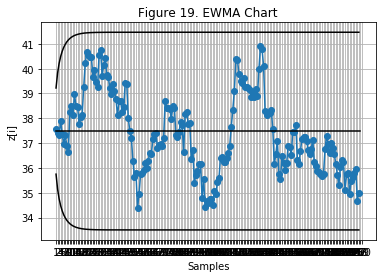

In [46]:
ucl_line = np.full(m,UCL)
lcl_line = np.full(m,LCL)
cl_line = np.full(m,CL_x)
plt.plot(z[1:],marker="o")
plt.plot(ucl_line[1:],color='k')
plt.plot(lcl_line[1:],color='k')
plt.plot(cl_line[1:],color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('Figure 19. EWMA Chart')
plt.ylabel('z[i]')
plt.xlabel('Samples')
plt.show()

# Assigning Causes and Removing Out-of-Control Conditions

The MR chart had a point out of bounds (Figure 13). This out of control point was removed and the control limits were recalculated (Figure 14).

The tabular two-sided CUSUM chart (Figure 16), CUSUM chart for mean (Figure 17) and CUSUM chart (Figure 18) for variance each have point(s) out of bounds. The process is in phase 2 when these charts are constructed. This means that the out of control points are an immediate concern and action is required. 

Out of control conditions were only observed in regards to peanut length (variable data) and not in peanut defects (attribute data). The reason for this is a large variation in peanut length. The peanut sorting machine is effective at sorting out peanut defects but less effective in sorting peanut lengths. The peanut grading machine used within the peanut processing plant sorts the peanuts into 2-4 different size ranges [1]. Moving forward, we recommend that the peanut sorting facilities update/improve their sorting process for peanut length such as using more selective/accurate machines to ensure that peanuts outside of the intended size are not passed through.

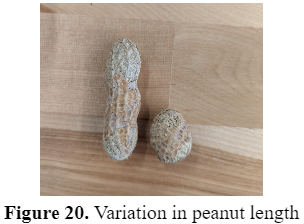

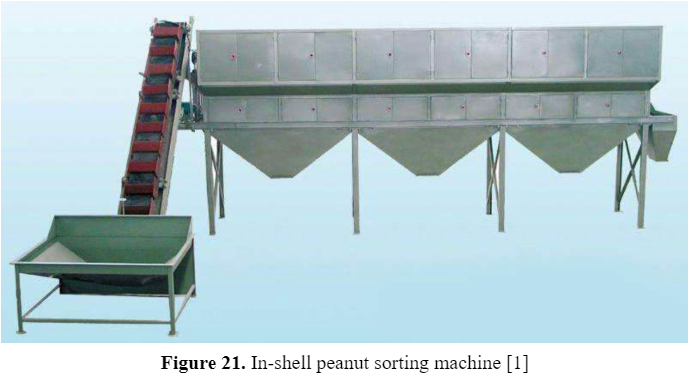

# References

[1] “Peanut Grading Machine,” Amisy Food Machine, 2018. [Online]. Available: https://www.amisyfoodmachine.com/nut-processing-equipment/peanut-grading-machine.html. [Accessed: 14-Apr-2022].